# Task

### Pre-defined code

In [2]:
# Importing all the required libraries
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from glob import glob
from natsort import natsorted
from tqdm import tqdm
from scipy.ndimage import convolve
style.use('ggplot')

In [3]:
# Load images from the folder to an array
image_folder = '../../data/images/A'  
gt_images = []

# Load all images from the folder
for file in tqdm(natsorted(glob(f'{image_folder}/*'))):
    img = cv2.imread(file, 1)  
    if img is not None:       
        gt_images.append(img)

if len(gt_images) > 0:
    gt_images = np.array(gt_images)
    print("Loaded images into an array with shape:", gt_images.shape)
else:
    print("No images were found in the specified folder.")

100%|██████████| 4/4 [00:00<00:00, 273.71it/s]

Loaded images into an array with shape: (4, 256, 256, 3)


In [ ]:
# Display the images in a grid
def show_image_grid(images, M, N, title='Title'):
    # Assuming 'images' is a numpy array of shape (num_images, height, width, channels)
    fig, axes = plt.subplots(M, N, figsize=(N * 2, M * 2))

    if len(images.shape) < 4:
        images = np.expand_dims(images.copy(), axis=0)

    fig.suptitle(title)
    for i in range(M):
        for j in range(N):
            if M==1 and N==1:
                ax = axes
            elif M == 1 or N==1:
                ax = axes[max(i, j)]
            else:
                ax = axes[i, j]
            index = i * N + j
            if index < images.shape[0]:
                ax.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
            ax.axis('off')
    plt.tight_layout()
    plt.show()

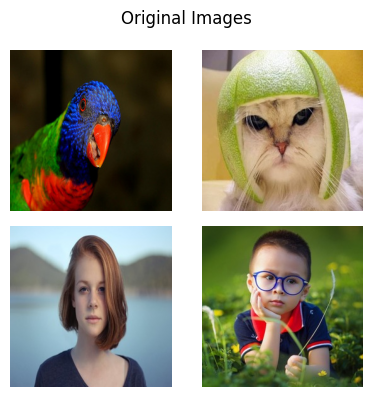

In [ ]:
show_image_grid(gt_images, 2, 2, 'Original Images')

### Q1 [2 Marks]

Given some set of images, you have to add two different kind of noises to it.
* Impulse noise (Salt and Pepper noise)
* Gaussian noise

<br/>
<b>Note: Implement all the noise addition algorithm from scratch.</b> You can use numpy library for convolution and other methods.
<br/><br/>
Add noises in small amount so that not all the information in image is changes.
<br/><br/>
Also please vary the parameters of noise and display images accordingly.

In [ ]:
def add_impulse_noise(image, noise_prob):
    # Assuming noise_prob is combined probability of Salt and Peper noise
    noisy_image = np.copy(image)

    noise = np.random.random(size=image.shape)

    noisy_image[noise < (noise_prob / 2)] = 0 # Setting to 0
    noisy_image[noise > 1 - (noise_prob / 2)] = 255 # Setting to 255

    #print(noisy_image.dtype)

    return noisy_image

def add_gaussian_noise(image, mean, std):
    gaussian_noise = np.random.normal(mean, std, image.shape)

    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 255)

    return noisy_image.astype(np.uint8)

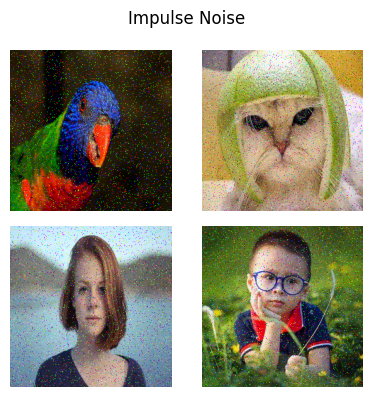

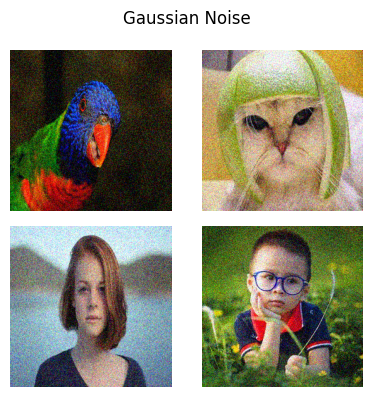

In [ ]:
# Write code here
impulse_noisy_images  = []
gaussian_noisy_images = []

for image in gt_images:
    impulse_noisy_images.append(add_impulse_noise(image, noise_prob=0.05))
    gaussian_noisy_images.append(add_gaussian_noise(image, mean=0., std=30))

impulse_noisy_images = np.array(impulse_noisy_images)
gaussian_noisy_images = np.array(gaussian_noisy_images)

show_image_grid(impulse_noisy_images, M=2, N=2, title='Impulse Noise')
show_image_grid(gaussian_noisy_images, M=2, N=2, title='Gaussian Noise')

#### Variation of Noise Probability for Impluse Noise

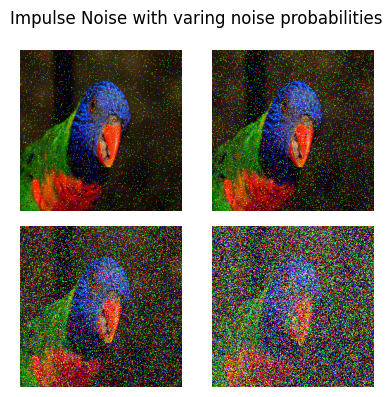

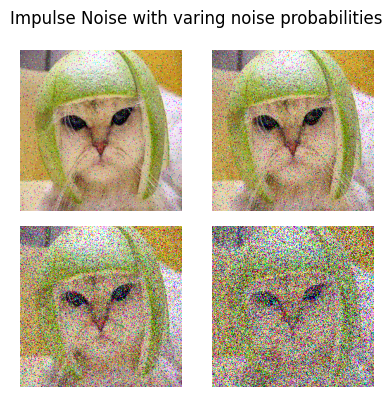

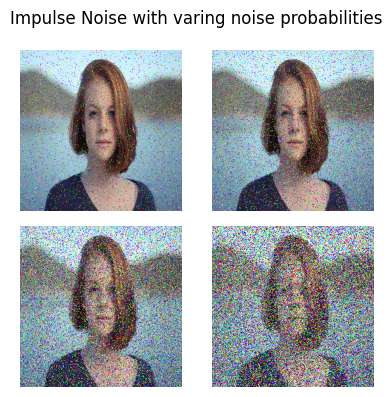

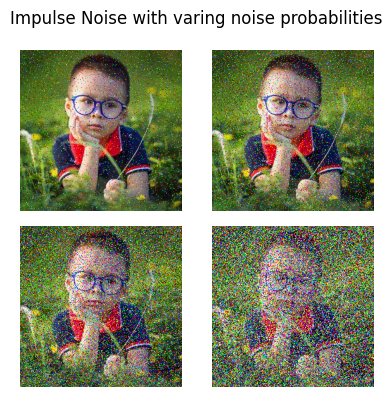

In [ ]:
noise_probs = [0.05, 0.1, 0.25, 0.5]

impulse_noisy_images_diff = [[],[],[],[]]
for i,image in enumerate(gt_images):
    for noise_prob in noise_probs:
        impulse_noisy_images_diff[i].append(add_impulse_noise(image, noise_prob=noise_prob))

for i, noise_prob in enumerate(noise_probs):
    impulse_noisy_images_diff[i] = np.array(impulse_noisy_images_diff[i])
    show_image_grid(impulse_noisy_images_diff[i], M=2, N=2, title='Impulse Noise with varing noise probabilities')

#### Variation of Mean and Standard Deviation for Gaussian Noise

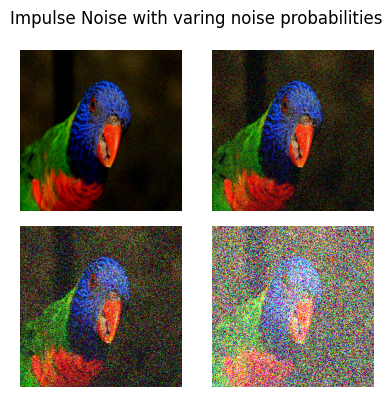

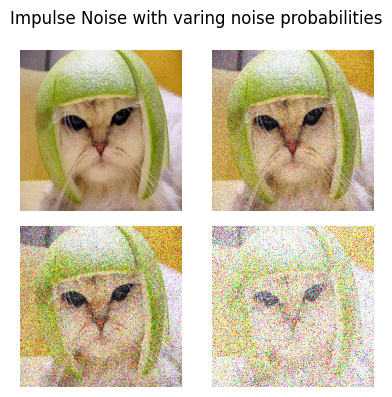

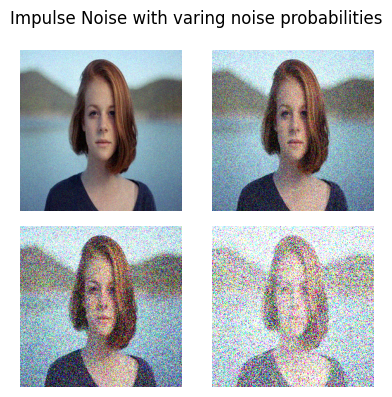

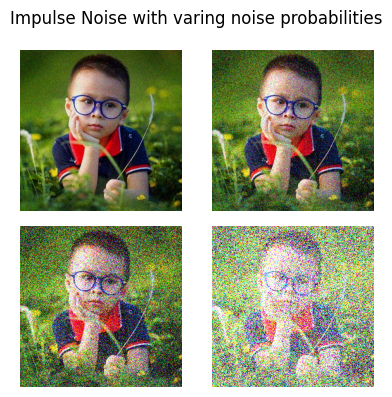

In [ ]:
means = [-10, 1, 15, 100]
stds = [10, 30, 60, 120]

gaussian_noisy_images_diff = [[],[],[],[]]
for i,image in enumerate(gt_images):
    for mean, std in zip(means, stds):
          gaussian_noisy_images_diff[i].append(add_gaussian_noise(image, mean=mean, std=std))

for i, noise_prob in enumerate(noise_probs):
    gaussian_noisy_images_diff[i] = np.array(gaussian_noisy_images_diff[i])
    show_image_grid(gaussian_noisy_images_diff[i], M=2, N=2, title='Impulse Noise with varing noise probabilities')

### Q2 [3 Marks]

Use three different filtering operations and denoise the noisy images generated in the previous question. You have to use following noises value for this and rest of the question.
<pre>
noise_prob: 0.05 (impulse noise)
gaussian noise: mean = 0, std = 30
</pre>

* Box Filter: Moving Average Filter

[![boxfilter.webp](https://i.postimg.cc/4NtD4Z7k/boxfilter.webp)](https://postimg.cc/9rm816YJ)

* Gaussian Filter

[![gaussian.png](https://i.postimg.cc/Kvy9NTzw/gaussian.png)](https://postimg.cc/NLp7G5Rk)

* Median Filter

[![median.png](https://i.postimg.cc/q704Hqj5/median.png)](https://postimg.cc/NKNW1sh6)



<b>Note: Implement all the filters algorithm from scratch.</b> You can use numpy library for convolution and other methods.

In [ ]:
def apply_box_filter(image, kernel_size = 5):

    assert kernel_size % 2 == 1, "Kernel size must be an odd number"

    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    blurred_image = np.zeros_like(image)

    for channel in range(image.shape[2]):
        blurred_image[:, :, channel] = convolve(image[:, :, channel], kernel, mode='constant', cval=0.0)

    return blurred_image

In [ ]:
def apply_gaussain_filter(image, kernel_size, sigma):
    k = kernel_size // 2
    x, y = np.meshgrid(np.arange(-k, k+1), np.arange(-k, k+1))

    gaussian_kernel = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

    gaussian_kernel /= np.sum(gaussian_kernel)

    blurred_image = np.zeros_like(image)

    for channel in range(image.shape[2]):
        blurred_image[:, :, channel] = convolve(image[:, :, channel], gaussian_kernel, mode='constant', cval=0.0)

    return blurred_image


In [ ]:
def apply_median_filter(image, kernel_size):

    def median_filter_manual(image_channel, kernel_size):

        rows, cols = image_channel.shape

        pad_size = kernel_size // 2

        padded_image = np.pad(image_channel, pad_size, mode='constant', constant_values=0)

        filtered_channel = np.zeros_like(image_channel)

        for i in range(rows):
            for j in range(cols):
                window = padded_image[i:i+kernel_size, j:j+kernel_size]

                median_value = np.median(window)

                filtered_channel[i, j] = median_value

        return filtered_channel

    filtered_image = np.zeros_like(image)

    for channel in range(image.shape[2]):
        filtered_image[:, :, channel] = median_filter_manual(image[:, :, channel], kernel_size)

    return filtered_image

#### Noise Removal Functions on Impulse Noise

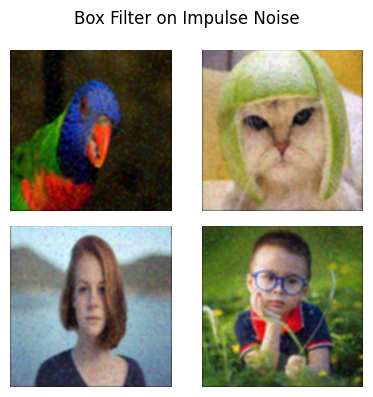

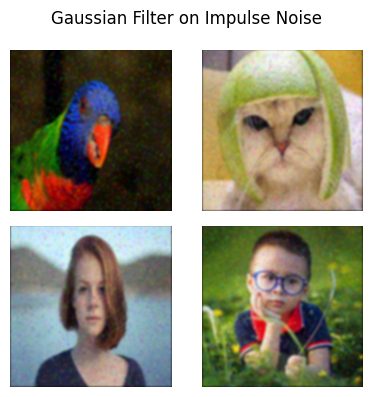

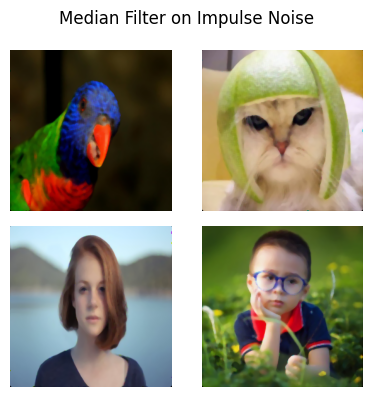

In [ ]:
# Write code here
box_filter_images_impulse       = []
gaussian_filter_images_impulse  = []
median_filter_images_impulse    = []

for image in impulse_noisy_images:
    box_filter_images_impulse.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_impulse.append(apply_gaussain_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_impulse.append(apply_median_filter(image, kernel_size=5))

box_filter_images_impulse = np.array(box_filter_images_impulse)
gaussian_filter_images_impulse = np.array(gaussian_filter_images_impulse)
median_filter_images_impulse = np.array(median_filter_images_impulse)

show_image_grid(box_filter_images_impulse, M=2, N=2, title='Box Filter on Impulse Noise')
show_image_grid(gaussian_filter_images_impulse, M=2, N=2, title='Gaussian Filter on Impulse Noise')
show_image_grid(median_filter_images_impulse, M=2, N=2, title='Median Filter on Impulse Noise')

#### Noise Removal Functions on Gaussian Noise

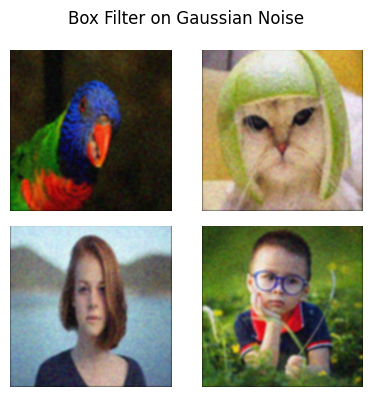

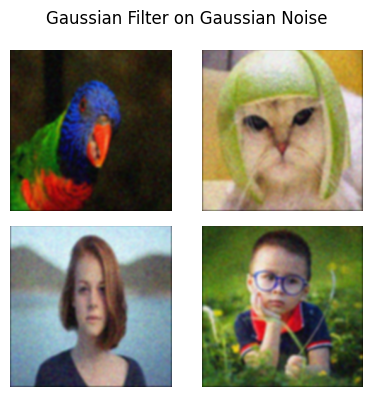

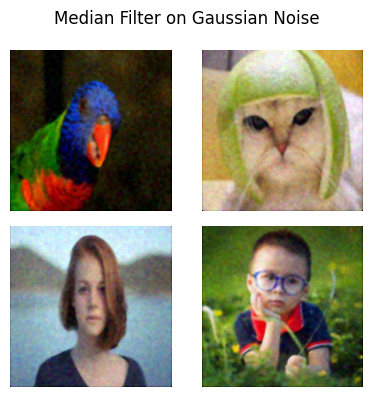

In [ ]:
# Write code here
box_filter_images_gaussian       = []
gaussian_filter_images_gaussian  = []
median_filter_images_gaussian    = []

for image in gaussian_noisy_images:
    box_filter_images_gaussian.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_gaussian.append(apply_gaussain_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_gaussian.append(apply_median_filter(image, kernel_size=5))

box_filter_images_gaussian = np.array(box_filter_images_gaussian)
gaussian_filter_images_gaussian = np.array(gaussian_filter_images_gaussian)
median_filter_images_gaussian = np.array(median_filter_images_gaussian)

show_image_grid(box_filter_images_gaussian, M=2, N=2, title='Box Filter on Gaussian Noise')
show_image_grid(gaussian_filter_images_gaussian, M=2, N=2, title='Gaussian Filter on Gaussian Noise')
show_image_grid(median_filter_images_gaussian, M=2, N=2, title='Median Filter on Gaussian Noise')

### Q3 [5 Marks]

Implement the Canny Edge Detector algorithm from scratch, you can use numpy library for computation operation such as convolution or sliding windows.
<br/>
Show canny edge results on the following denoised images from previous question:
* box_filter_images_impulse: [4, 256, 256, 3]
* gaussian_filter_images_impulse: [4, 256, 256, 3]
* median_filter_images_impulse: [4, 256, 256, 3]
* box_filter_images_gaussian: [4, 256, 256, 3]
* gaussian_filter_images_gaussian: [4, 256, 256, 3]
* median_filter_images_gaussian: [4, 256, 256, 3]

Total number of images in each of above array is: 4 <br/>
Each is of size H: 256, W: 256 and Channels: 3 <br/><br/>
Compare your implementation with Opencv canny edge detector method.<br/><br/>
Create a table of 6 x 4 (where 6 is all the filters and 4 is number of images) and show Root Mean Square Error between your canny edge image and opencv canny edge image.

# Canny Edge Detection Algorithm
---

## 1. Smoothing (Noise Reduction)

To reduce noise in the image, a smoothing filter is applied. This is typically done with one of the following methods:

- **Box Filter**: A simple average filter where each pixel is replaced by the average of its neighboring pixels in a box of predefined size.
  
- **Gaussian Filter**: A filter where each pixel is replaced by a weighted average of its neighbors, with weights determined by a Gaussian distribution. This is more effective at smoothing while preserving edges compared to the Box filter.
  
  The Gaussian filter kernel can be defined as:

  $$
  G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
  $$

- **Median Filter**: Each pixel is replaced by the median of its neighboring pixels. This is particularly effective for reducing "salt and pepper" noise.

---

## 2. Gradient Calculation

Once the image is smoothed, the gradient is calculated using a filter like the Sobel operator. This calculates both horizontal ($G_x$) and vertical ($G_y$) gradients of the image, which represent the changes in pixel intensity.

The edge gradient ($G$) and direction (angle) are then computed using the following equations:

- **Gradient Magnitude**:

  $$
  G = \sqrt{G_x^2 + G_y^2}
  $$

- **Gradient Direction**:

  $$
  \theta = \tan^{-1}\left(\frac{G_y}{G_x}\right)
  $$

The gradient magnitude highlights the strength of the edges, while the angle gives the direction of the edge.

---

## 3. Non-Maximum Suppression

After calculating the gradient, non-maximum suppression is applied to thin out the edges. This step removes any pixels that are not considered to be part of an edge. Each pixel is compared to its neighbors along the direction of the gradient, and if it is not a local maximum, it is suppressed (set to zero).

---

## 4. Double Thresholding

Double thresholding is used to classify pixels as strong edges, weak edges, or non-edges based on two threshold values, `Threshold1` and `Threshold2`.

- **Strong edges**: Pixels with a gradient magnitude above the higher threshold (`Threshold1`).
- **Weak edges**: Pixels with a gradient magnitude between `Threshold1` and `Threshold2`.
- **Non-edges**: Pixels with a gradient magnitude below `Threshold2`.

This step helps in distinguishing strong edges that are important, while keeping weak edges that may be connected to strong edges.

---

## 5. Edge Tracking by Hysteresis

Finally, edge tracking by hysteresis is performed to determine which weak edges are connected to strong edges. If a weak edge is connected to a strong edge, it is considered a true edge; otherwise, it is discarded. This step ensures that the edges detected are continuous and well-defined.

In [ ]:
def apply_canny_edge_detector_opencv(image, threshold1, threshold2):

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Canny edge detector
    edges = cv2.Canny(gray_image, threshold1, threshold2)

    # This is done only for converting 1 channel image to 3 channels for
    # visualization purpose in matplotlib
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    return edges


def apply_canny_edge_detector_self(image, threshold1, threshold2):
    def RGB_to_GRAY(image):
        R_COEF = 0.2989
        G_COEF = 0.5870
        B_COEF = 0.1140

        b, g, r = image[..., 0], image[..., 1], image[..., 2]
        grayscale_image = B_COEF * b + G_COEF * g + R_COEF * r

        return grayscale_image

    def Calculate_Gradient(image):
        Kx = np.array(
            [[-1, 0, 1],
            [-2, 0, 2],
            [-1, 0, 1]], np.float32
        )

        Ky = np.array(
            [[1, 2, 1],
            [0, 0, 0],
            [-1, -2, -1]], np.float32
        )

        Gradient_Y = convolve(image, Ky)
        Gradient_X = convolve(image, Kx)

        G = np.hypot(Gradient_X, Gradient_Y)
        theta = np.arctan2(Gradient_Y, Gradient_X) * 180. / np.pi
        theta[theta < 0] += 180  # Convert angles to [0, 180] range

        return G, theta

    def Non_Max_Supression(image, D):
        M, N = image.shape
        zero_mat = np.zeros((M, N), dtype=np.int32)
        angle = D

        for i in range(1, M-1):
            for j in range(1, N-1):
                try:
                    q = r = 0

                    # angle 0
                    if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                        q = image[i, j+1]
                        r = image[i, j-1]
                    # angle 45
                    elif (22.5 <= angle[i, j] < 67.5):
                        q = image[i+1, j-1]
                        r = image[i-1, j+1]
                    # angle 90
                    elif (67.5 <= angle[i, j] < 112.5):
                        q = image[i+1, j]
                        r = image[i-1, j]
                    # angle 135
                    elif (112.5 <= angle[i, j] < 157.5):
                        q = image[i-1, j-1]
                        r = image[i+1, j+1]

                    if (image[i, j] >= q) and (image[i, j] >= r):
                        zero_mat[i, j] = image[i, j]
                    else:
                        zero_mat[i, j] = 0

                except IndexError:
                    pass

        return zero_mat

    def Double_Thresholding(image, th1, th2, strongP, weakP):
        M, N = image.shape
        result = np.zeros((M, N), dtype=np.int32)

        strongI, strongJ = np.where(image >= th2)
        weakI, weakJ = np.where((image >= th1) & (image < th2))

        result[strongI, strongJ] = strongP
        result[weakI, weakJ] = weakP

        return result

    def Edge_Tracking_Hysterisis(image, strongP, weakP):
        M, N = image.shape
        res = np.copy(image)

        for i in range(1, M-1):
            for j in range(1, N-1):
                if image[i, j] == weakP:
                    try:
                        if (image[i+1, j-1] == strongP) or (image[i+1, j] == strongP) or (image[i+1, j+1] == strongP) or (image[i, j-1] == strongP) or (image[i, j+1] == strongP) or (image[i-1, j-1] == strongP) or (image[i-1, j] == strongP) or (image[i-1, j+1] == strongP):
                            res[i, j] = strongP
                        else:
                            res[i, j] = 0
                    except IndexError:
                        pass

        return res.astype(np.uint8)

    gray_image = RGB_to_GRAY(image)
    gradient_mat, theta_mat = Calculate_Gradient(gray_image)
    NMS_mat = Non_Max_Supression(gradient_mat, theta_mat)
    DT_mat = Double_Thresholding(NMS_mat, threshold1, threshold2, 255, 220)
    edges = Edge_Tracking_Hysterisis(DT_mat, 255, 220)

    # Convert to 3 channels for visualization
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    return edges

In [ ]:
threshold1 = 80
threshold2 = 180

#### Box Filter on Impulse Noise

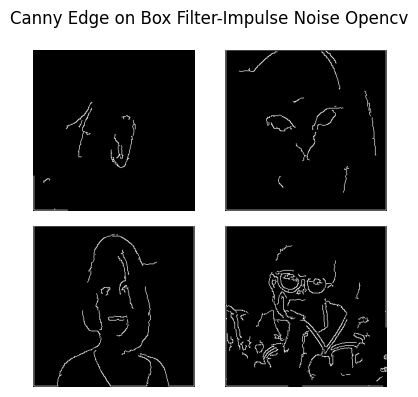

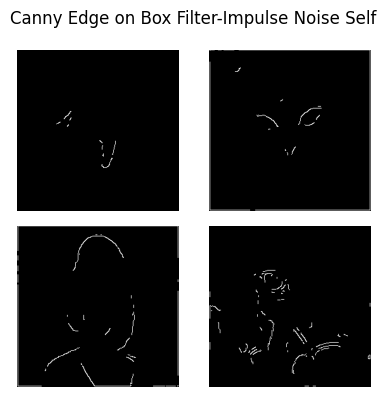

In [ ]:
canny_edge_opencv_box_filter_images_impulse = []
canny_edge_self_box_filter_images_impulse = []

for image in box_filter_images_impulse:
    canny_edge_opencv_box_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_box_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_box_filter_images_impulse = np.array(canny_edge_opencv_box_filter_images_impulse)
canny_edge_self_box_filter_images_impulse = np.array(canny_edge_self_box_filter_images_impulse)

show_image_grid(canny_edge_opencv_box_filter_images_impulse, M=2, N=2, title='Canny Edge on Box Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_box_filter_images_impulse, M=2, N=2, title='Canny Edge on Box Filter-Impulse Noise Self')

#### Gaussian Filter on Impluse Noise

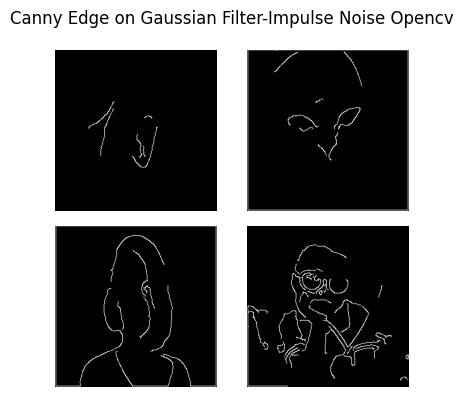

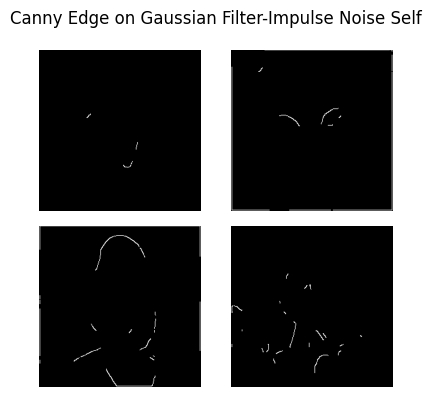

In [ ]:
canny_edge_opencv_gaussian_filter_images_impulse = []
canny_edge_self_gaussian_filter_images_impulse = []

for image in gaussian_filter_images_impulse:
    canny_edge_opencv_gaussian_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_gaussian_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_gaussian_filter_images_impulse = np.array(canny_edge_opencv_gaussian_filter_images_impulse)
canny_edge_self_gaussian_filter_images_impulse = np.array(canny_edge_self_gaussian_filter_images_impulse)

show_image_grid(canny_edge_gaussian_filter_images_impulse, M=2, N=2, title='Canny Edge on Gaussian Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_gaussian_filter_images_impulse, M=2, N=2, title='Canny Edge on Gaussian Filter-Impulse Noise Self')

#### Median Filter on Impulse Noise

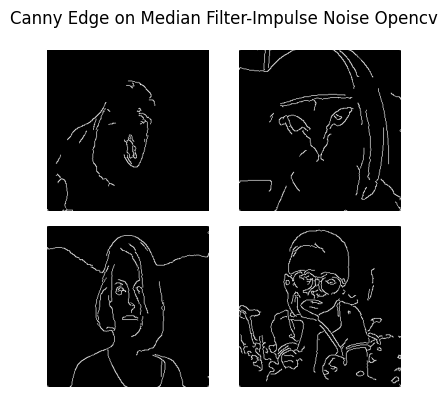

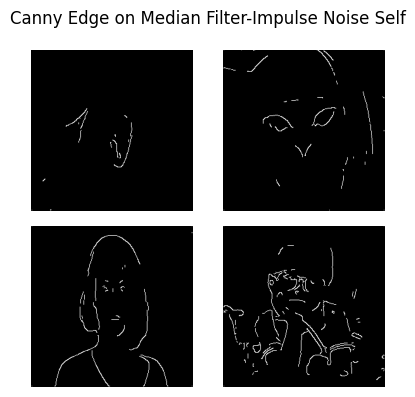

In [ ]:
canny_edge_opencv_median_filter_images_impulse = []
canny_edge_self_median_filter_images_impulse = []

for image in median_filter_images_impulse:
    canny_edge_opencv_median_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_median_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_median_filter_images_impulse = np.array(canny_edge_opencv_median_filter_images_impulse)
canny_edge_self_median_filter_images_impulse = np.array(canny_edge_self_median_filter_images_impulse)

show_image_grid(canny_edge_median_filter_images_impulse, M=2, N=2, title='Canny Edge on Median Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_median_filter_images_impulse, M=2, N=2, title='Canny Edge on Median Filter-Impulse Noise Self')

#### Box Filter on Gaussian Noise

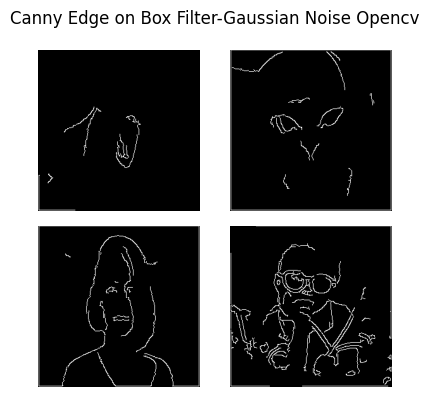

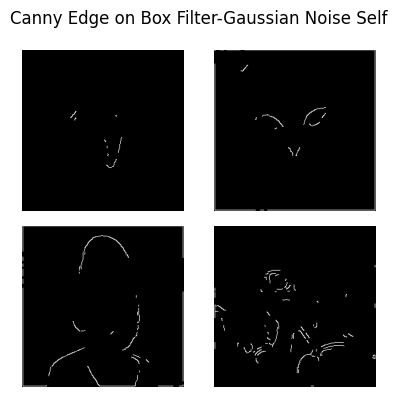

In [ ]:
canny_edge_opencv_box_filter_images_gaussian = []
canny_edge_self_box_filter_images_gaussian = []

for image in box_filter_images_gaussian:
    canny_edge_opencv_box_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_box_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_box_filter_images_gaussian = np.array(canny_edge_opencv_box_filter_images_gaussian)
canny_edge_self_box_filter_images_gaussian = np.array(canny_edge_self_box_filter_images_gaussian)

show_image_grid(canny_edge_box_filter_images_gaussian, M=2, N=2, title='Canny Edge on Box Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_box_filter_images_gaussian, M=2, N=2, title='Canny Edge on Box Filter-Gaussian Noise Self')

#### Gaussian Filter on Gaussian Noise

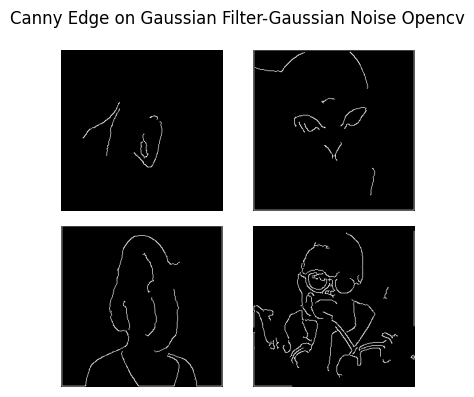

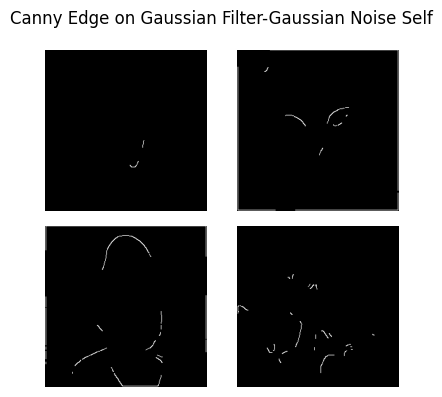

In [ ]:
canny_edge_opencv_gaussian_filter_images_gaussian = []
canny_edge_self_gaussian_filter_images_gaussian = []

for image in gaussian_filter_images_gaussian:
    canny_edge_opencv_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_gaussian_filter_images_gaussian = np.array(canny_edge_opencv_gaussian_filter_images_gaussian)
canny_edge_self_gaussian_filter_images_gaussian = np.array(canny_edge_self_gaussian_filter_images_gaussian)

show_image_grid(canny_edge_gaussian_filter_images_gaussian, M=2, N=2, title='Canny Edge on Gaussian Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_gaussian_filter_images_gaussian, M=2, N=2, title='Canny Edge on Gaussian Filter-Gaussian Noise Self')

#### Median Filter on Gaussian Noise

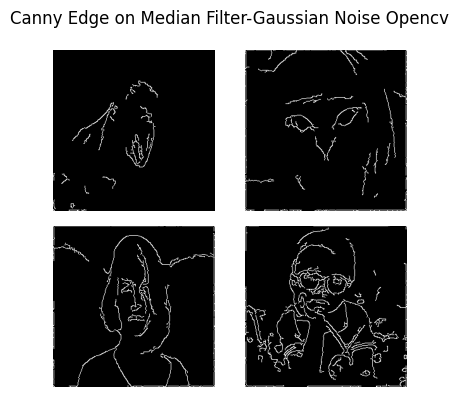

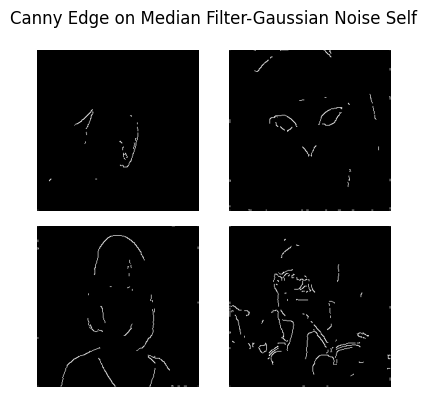

In [ ]:
canny_edge_opencv_median_filter_images_gaussian = []
canny_edge_self_median_filter_images_gaussian = []

for image in median_filter_images_gaussian:
    canny_edge_opencv_median_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_median_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_median_filter_images_gaussian = np.array(canny_edge_opencv_median_filter_images_gaussian)
canny_edge_self_median_filter_images_gaussian = np.array(canny_edge_self_median_filter_images_gaussian)

show_image_grid(canny_edge_median_filter_images_gaussian, M=2, N=2, title='Canny Edge on Median Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_median_filter_images_gaussian, M=2, N=2, title='Canny Edge on Median Filter-Gaussian Noise Self')

#### RMSE Calculation

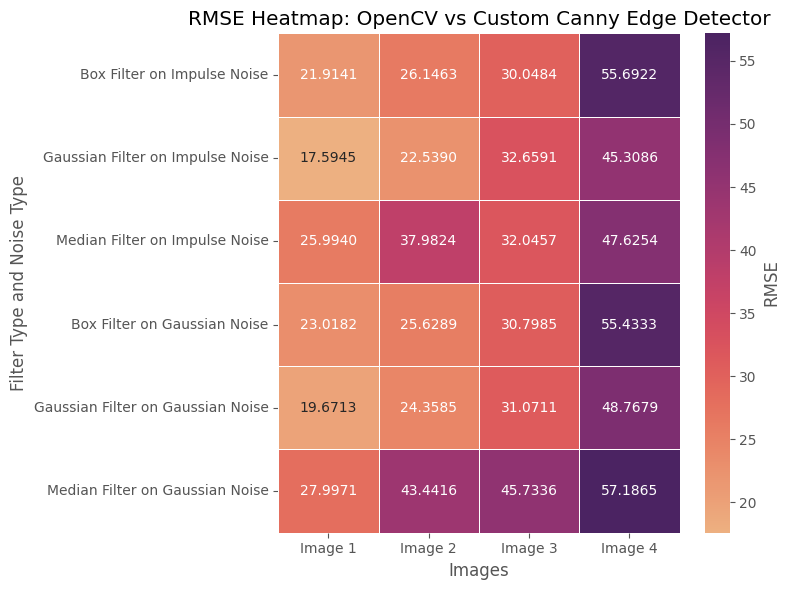

In [ ]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
def compute_rmse(image1, image2):
    return  mean_squared_error(image1.astype(np.float32).flatten(), image2.astype(np.float32).flatten(), squared=False)


rmse_table = np.zeros((6, 4))


rmse_table[0, :] = [compute_rmse(canny_edge_opencv_box_filter_images_impulse[i], canny_edge_self_box_filter_images_impulse[i]) for i in range(4)]
rmse_table[1, :] = [compute_rmse(canny_edge_opencv_gaussian_filter_images_impulse[i], canny_edge_self_gaussian_filter_images_impulse[i]) for i in range(4)]
rmse_table[2, :] = [compute_rmse(canny_edge_opencv_median_filter_images_impulse[i], canny_edge_self_median_filter_images_impulse[i]) for i in range(4)]
rmse_table[3, :] = [compute_rmse(canny_edge_opencv_box_filter_images_gaussian[i], canny_edge_self_box_filter_images_gaussian[i]) for i in range(4)]
rmse_table[4, :] = [compute_rmse(canny_edge_opencv_gaussian_filter_images_gaussian[i], canny_edge_self_gaussian_filter_images_gaussian[i]) for i in range(4)]
rmse_table[5, :] = [compute_rmse(canny_edge_opencv_median_filter_images_gaussian[i], canny_edge_self_median_filter_images_gaussian[i]) for i in range(4)]


filters = ["Box Filter on Impulse Noise", "Gaussian Filter on Impulse Noise", "Median Filter on Impulse Noise", "Box Filter on Gaussian Noise", "Gaussian Filter on Gaussian Noise", "Median Filter on Gaussian Noise"]
images = ["Image 1", "Image 2", "Image 3", "Image 4"]

rmse_df = pd.DataFrame(rmse_table, index=filters, columns=images)

plt.figure(figsize=(8, 6))
sns.heatmap(rmse_df, annot=True, cmap="flare", fmt=".4f", linewidths=0.5, cbar_kws={"label": "RMSE"})
plt.title("RMSE Heatmap: OpenCV vs Custom Canny Edge Detector")
plt.ylabel("Filter Type and Noise Type")
plt.xlabel("Images")
plt.tight_layout()
plt.show()